In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
data_path = 'C:\\Users\\h3ojeremy\\Desktop\\機器學習百日馬拉松\\Day051-Day053\\'
df_train = pd.read_csv(data_path + 'train_data.csv')
df_test = pd.read_csv(data_path + 'test_features.csv')
print(df_train.shape)
print(df_test.shape)

(113, 22)
(33, 21)


In [3]:
# 重組資料成為訓練 / 預測用格式

# poi 這個 column 是只有 train set 才有的 (label)
train_Y = df_train['poi'].values
df_train = df_train.drop(['poi'] , axis=1) #將 column = 'poi' drop 出來
train_num = df_train.shape[0]

df = pd.concat([df_train, df_test])
df = df.drop(['name'], axis=1)
print(df.shape)
df.head(10)

(146, 20)


,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,4.0,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,14.0,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,NaN,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,25.0,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0
5,NaN,10259.0,NaN,NaN,joe.hirko@enron.com,30766064.0,77978.0,NaN,NaN,NaN,NaN,NaN,2856.0,NaN,NaN,NaN,NaN,NaN,91093.0,30766064.0
6,NaN,NaN,NaN,NaN,scott.yeager@enron.com,8308552.0,53947.0,NaN,NaN,NaN,NaN,NaN,147950.0,3576206.0,NaN,158403.0,NaN,NaN,360300.0,11884758.0
7,1200000.0,27610.0,-144062.0,NaN,wes.colwell@enron.com,NaN,16514.0,40.0,240.0,11.0,NaN,NaN,101740.0,698242.0,NaN,288542.0,1132.0,1758.0,1490344.0,698242.0
8,7000000.0,202911.0,-300000.0,NaN,kenneth.lay@enron.com,34348384.0,99832.0,36.0,123.0,16.0,81525000.0,3600000.0,10359729.0,14761694.0,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0
9,600000.0,NaN,NaN,NaN,ben.glisan@enron.com,384728.0,125978.0,16.0,52.0,6.0,NaN,71023.0,200308.0,393818.0,NaN,274975.0,874.0,873.0,1272284.0,778546.0


In [4]:
# 檢查 DataFrame 空缺值的狀態
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data.head(20))
na_check(df)

,Missing Ratio
loan_advances,97.260274
director_fees,88.356164
restricted_stock_deferred,87.671233
deferral_payments,73.287671
deferred_income,66.438356
long_term_incentive,54.794521
bonus,43.835616
from_messages,41.095890
from_poi_to_this_person,41.095890
from_this_person_to_poi,41.095890


In [5]:
print(df.columns)
ratio = 0.52
selected_columns = [] #只留下 非 NaN 值比率大於 ratio 的 columns 
for col in df.columns:
    if (((~df_train[col].isnull()).values.sum())/df.shape[0] > ratio):
        selected_columns.append(col)
print(selected_columns)
df = df[selected_columns]

Index(['bonus', 'deferral_payments', 'deferred_income', 'director_fees',
       'email_address', 'exercised_stock_options', 'expenses', 'from_messages',
       'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances',
       'long_term_incentive', 'other', 'restricted_stock',
       'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi',
       'to_messages', 'total_payments', 'total_stock_value'],
      dtype='object')
['email_address', 'exercised_stock_options', 'restricted_stock', 'total_payments', 'total_stock_value']


In [6]:
#確定只有 int64, float64, object 三種類型後, 分別將欄位名稱存於三個 list 中
int_features = []
float_features = []
object_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64':
        float_features.append(feature)
    elif dtype == 'int64':
        int_features.append(feature)
    else:
        object_features.append(feature)
print(f'{len(int_features)} Integer Features : {int_features}\n')
print(f'{len(float_features)} Float Features : {float_features}\n')
print(f'{len(object_features)} Object Features : {object_features}')

0 Integer Features : []

4 Float Features : ['exercised_stock_options', 'restricted_stock', 'total_payments', 'total_stock_value']

1 Object Features : ['email_address']


In [7]:
#name 是key 所以不處理
#對 email_address 做 LabelEncoder

df['email_address'] = df['email_address'].fillna('NaNs')
df['email_address'] = LabelEncoder().fit_transform(df['email_address'])
df.head(10)

,email_address,exercised_stock_options,restricted_stock,total_payments,total_stock_value
0,56,19794175.0,2748364.0,505050.0,22542539.0
1,36,19250000.0,6843672.0,8682716.0,26093672.0
2,83,1624396.0,869220.0,2003885.0,2493616.0
3,73,NaN,985032.0,2652612.0,985032.0
4,10,NaN,126027.0,1639297.0,126027.0
5,45,30766064.0,NaN,91093.0,30766064.0
6,98,8308552.0,3576206.0,360300.0,11884758.0
7,111,NaN,698242.0,1490344.0,698242.0
8,57,34348384.0,14761694.0,103559793.0,49110078.0
9,4,384728.0,393818.0,1272284.0,778546.0


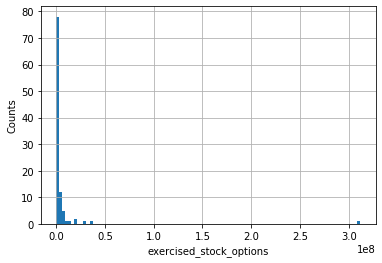

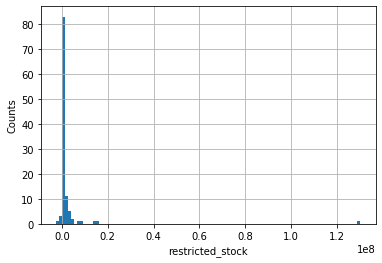

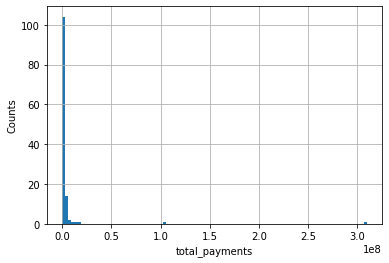

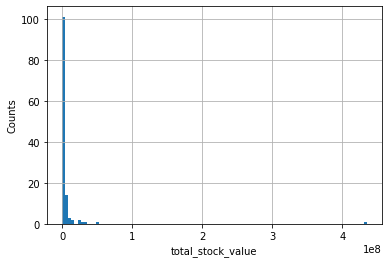

In [8]:
ncols = 1;
nrows = len(float_features)
ind = 0
for f in float_features:
    plt.figure(num=ind)
    ind += 1
    s_tmp = df[f][(~df[f].isnull())] #拿非NaN 的來算統計    
    s_tmp.hist(bins = 100)
    plt.ylabel('Counts')
    plt.xlabel(f)
plt.show()


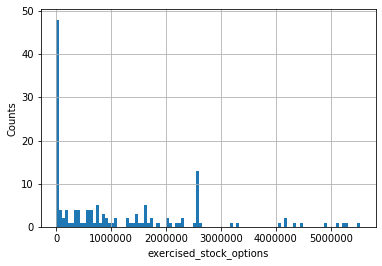

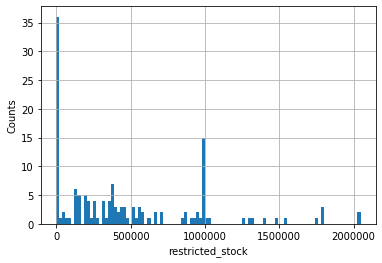

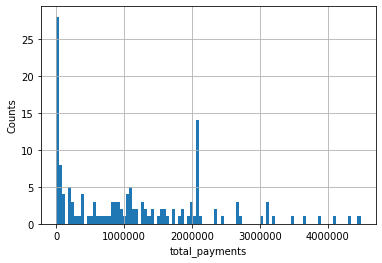

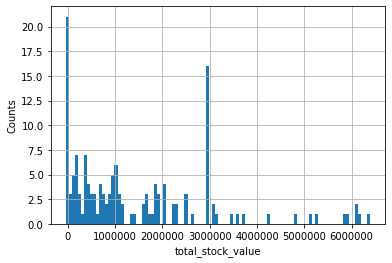

In [9]:
#對於每個 Float Feature 的分布，去除篇移值(用中位數替代)

ncols = 1;
nrows = len(float_features)
ind = 0
for f in float_features:
    plt.figure(num=ind)
    ind += 1
    s_tmp = df[f][(~df[f].isnull())] #拿非NaN 的來算統計
    md = s_tmp.median()
    mean = s_tmp.mean()
    new_series = df[f].copy()
#     new_series[df[f].isnull()] = md #nan 值用中位數取代
#     new_series[df[f].isnull()] = mean #nan 值用mean取代
    new_series[df[f].isnull()] = 0 #nan 值用 0 取代

    
#     thr_u = s_tmp.quantile(0.98) #upper 
#     thr_l = s_tmp.quantile(0.02) #lower
#     new_series[new_series>thr_u] = thr_u 
#     new_series[new_series<thr_l] = thr_l

    
    Q_1 = s_tmp.quantile(q=0.25)
    Q_3 = s_tmp.quantile(q=0.75)
    IQR = Q_3 - Q_1
    new_series[new_series>( Q_3 + 1.5*IQR )] =  Q_3
    new_series[new_series<( Q_1 - 1.5*IQR )] =  Q_1
    
    
    new_series.hist(bins = 100)
    plt.ylabel('Counts')
    plt.xlabel(f)
    
    df[f] = new_series #將處理後的 Series 塞回去原本的 DataFrame
plt.show()

In [10]:
df.head(10)

,email_address,exercised_stock_options,restricted_stock,total_payments,total_stock_value
0,56,2547724.0,1002369.75,505050.0,2949846.75
1,36,2547724.0,1002369.75,2093263.0,2949846.75
2,83,1624396.0,869220.00,2003885.0,2493616.00
3,73,0.0,985032.00,2652612.0,985032.00
4,10,0.0,126027.00,1639297.0,126027.00
5,45,2547724.0,0.00,91093.0,2949846.75
6,98,2547724.0,1002369.75,360300.0,2949846.75
7,111,0.0,698242.00,1490344.0,698242.00
8,57,2547724.0,1002369.75,2093263.0,2949846.75
9,4,384728.0,393818.00,1272284.0,778546.00


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [12]:

# 13 = 3 + 3 + 3 + 4  (positive)
# 100 = 25 + 25 + 25 + 25 (negative)
# 建立 indicate set

ind_1 = np.zeros((113), dtype=bool)
start_ind = 13 #開始 negative
for i in range(3):
    ind_1[i] = True;
for i in range(start_ind, start_ind+25):
    ind_1[i] = True
    
ind_2 = np.zeros((113), dtype=bool)
start_ind = 13 #開始 negative
for i in range(3, 6):
    ind_2[i] = True;
for i in range(start_ind+25, start_ind+50):
    ind_2[i] = True;
    
ind_3 = np.zeros((113), dtype=bool)
start_ind = 13 #開始 negative
for i in range(6, 9):
    ind_3[i] = True;
for i in range(start_ind+50, start_ind+75):
    ind_3[i] = True;

ind_4 = np.zeros((113), dtype=bool)
start_ind = 13 #開始 negative
for i in range(9, 13):
    ind_4[i] = True;
for i in range(start_ind+75, start_ind+100):
    ind_4[i] = True;

In [13]:
indices = [ind_1, ind_2, ind_3, ind_4]
for i in range(len(indices)):
    print('i=%d \n'%i, indices[i])

i=0 
 [ True  True  True False False False False False False False False False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False]
i=1 
 [False False False  True  True  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True 

In [14]:
# log_reg  = LogisticRegression(solver='newton-cg') #一直紅字，不收斂
log_reg = LogisticRegression(solver='lbfgs')

train_X = df[:train_num].values

# Cross Validation  (K-fold)
acc = 0
# 訓練模型
for i in range(len(indices)):
    train_ind = ~indices[i]
    test_ind = indices[i]
    train_X_i = train_X[train_ind]
    train_Y_i = train_Y[train_ind]
    log_reg.fit(train_X_i, train_Y_i)

    x_test_i = train_X[test_ind] #取 df 後半段為 test
    y_test_i = train_Y[test_ind]
    y_pred_i = log_reg.predict(x_test_i)
    acc_i = metrics.accuracy_score(y_test_i, y_pred_i)
    acc += acc_i/len(indices)
print("Accuracy: ", acc)

Accuracy:  0.8500615763546798


In [15]:

# #拿全部的資料來 Train
# log_reg.fit(train_X, train_Y)
# y_pred = log_reg.predict(train_X)
# acc = metrics.accuracy_score(y_pred, train_Y)
# print('acc = %.5f '%acc)


# test_X = df[train_num:].values
# #注意 logistic regression 的預測輸出，第一個column 是 0 的機率，第二個 column 是 1 的機率
# y_pred_prob = log_reg.predict_proba(test_X)[:, 0]

In [16]:
#拿四種 K-fold 的模型 所估計的機率取平均
test_X = df[train_num:].values

y_pred_prob_avg = np.zeros(len(test_X))
for i in range(len(indices)):
    train_ind = ~indices[i]
    test_ind = indices[i]
    train_X_i = train_X[train_ind]
    train_Y_i = train_Y[train_ind]
    log_reg.fit(train_X_i, train_Y_i)
    
    test_y_pred_i = log_reg.predict_proba(test_X)[:, 0]
    y_pred_prob_avg += test_y_pred_i/len(indices)


y_pred_prob = y_pred_prob_avg

In [17]:
submission_df = pd.DataFrame()
submission_df['name'] = df_test['name']
submission_df['poi'] = y_pred_prob
print(submission_df)

                    name       poi
0       BELDEN TIMOTHY N  0.870680
1     BOWEN JR RAYMOND M  0.851609
2         HANNON KEVIN P  0.950384
3       DELAINEY DAVID W  0.911918
4       CAUSEY RICHARD A  0.816339
5       HICKERSON GARY J  0.786283
6         FREVERT MARK A  0.914354
7            CHAN RONNIE  0.495306
8   DONAHUE JR JEFFREY M  0.718465
9      REYNOLDS LAWRENCE  0.918462
10      HORTON STANLEY C  0.946795
11         LEWIS RICHARD  0.614604
12    SHERRICK JEFFREY B  0.663220
13        MEYER JEROME J  0.500366
14   DERRICK JR. JAMES V  0.697825
15              PIRO JIM  0.496980
16   DETMERING TIMOTHY J  0.851945
17     KISHKILL JOSEPH G  0.553407
18        BAY FRANKLIN R  0.622394
19        PRENTICE JAMES  0.693751
20                 TOTAL  0.914354
21        FALLON JAMES B  0.934324
22            METTS MARK  0.639410
23         WODRASKA JOHN  0.532245
24   MORDAUNT KRISTINA M  0.592630
25      CARTER REBECCA C  0.536775
26      BHATNAGAR SANJAY  0.862546
27      WALTERS GARE

In [24]:
import time
time_array = time.localtime() # localtime
time_str = time.strftime("%m-%dT%H%M%S", time_array)

submission_filename = 'Cheng_'+'Result_'+time_str+'.csv'
submission_df.to_csv(submission_filename, index=False)